# Домашнее задание по теме "Работа с переменными"

- Потренируем навыки, полученные на практическом занятии. Пользуясь новыми знаниями, проведите эксплоративный анализ данных на данных недвижимости Бостона, и попытайтесь обучить линейную модель наиболее качественно. Все ваши действия и решения описывайте в markdown.
- Данные вы сможете получить исполнив следующий код:
    - from sklearn.datasets import load_boston
    - import pandas as pd
    - data = pd.read_csv(load_boston()[‘filename’], skiprows=1)
- Переменная, которую надо предсказать - ’MEDV’.
- Прочитать информацию о содержимом датасета:
   - print(load_boston()[‘DESCR’])
- Если вы неудовлетворенны результатом, но лучшего решения предложить не можете, то высылайте задание на проверку.
- Цель задания - закрепить полученные навыки.

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from sklearn.datasets import load_boston
import pandas as pd
data = pd.read_csv(load_boston()['filename'], skiprows=1)

In [3]:
print(load_boston()['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [4]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [6]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


Количественные: CRIM, ZN, INDUS, NOX, RM, AGE, DIS, TAX, PTRATIO, B, LSTAT, MEDV

Категориальные: CHAS, RAD

### Категориальные признаки

In [7]:
def plot__bar(variable):
    """
    input: name of fitch from the dataset presented like Dataframe/series
    output: bar diagramm
    """
    # получаем значение переменной
    input_data = data[variable]
    # пересчитывам значения
    varValue = input_data.value_counts()

    # рисуем
    plt.figure(figsize = (9,3))
    plt.bar(varValue.index, varValue)
    plt.xticks(varValue.index, varValue.index.values)
    plt.ylabel("Frequency")
    plt.title(variable)
    plt.show()
    print("{}: \n{}".format(variable,varValue))

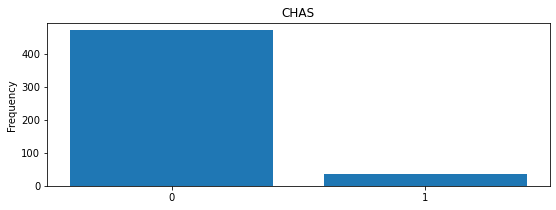

CHAS: 
0    471
1     35
Name: CHAS, dtype: int64


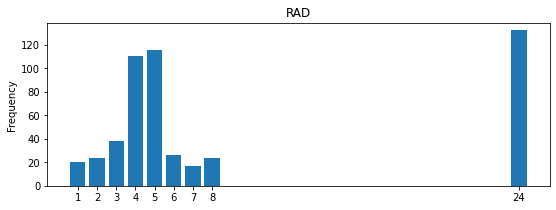

RAD: 
24    132
5     115
4     110
3      38
6      26
2      24
8      24
1      20
7      17
Name: RAD, dtype: int64


In [8]:
names1 = ['CHAS', 'RAD']
for i in names1:
    plot__bar(i)

### Количественные признаки

In [9]:
def plot__hist(variable):
    '''
    input: name of fitch from the dataset presented like Dataframe/series
    output: bar diagramm
    '''
    plt.figure(figsize = (10, 5))
    plt.hist(data[variable], bins = 10)
    plt.xlabel(variable)
    plt.ylabel("Frequency")
    plt.title("{} distribution with hist".format(variable))
    plt.show()

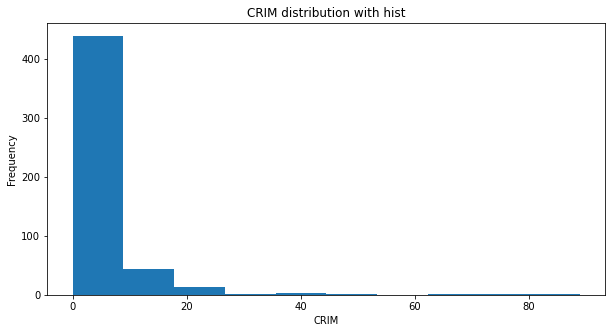

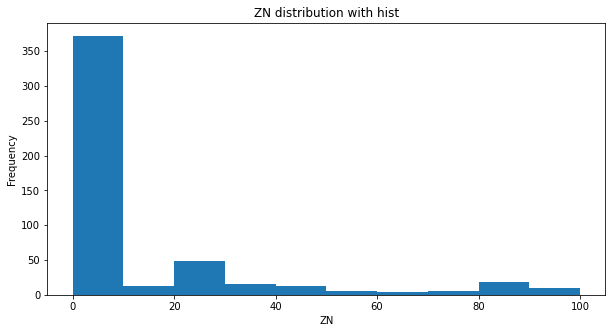

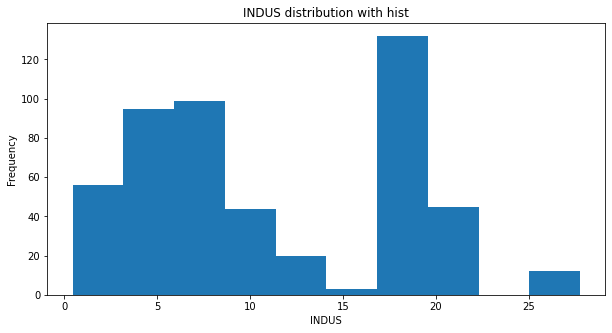

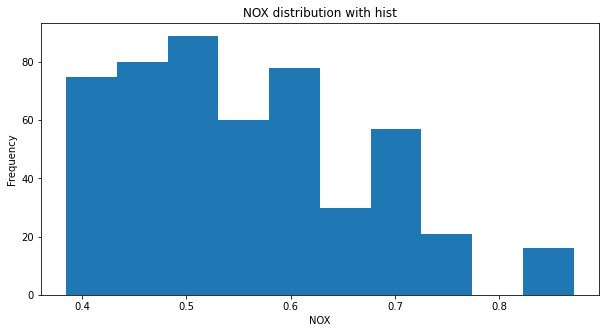

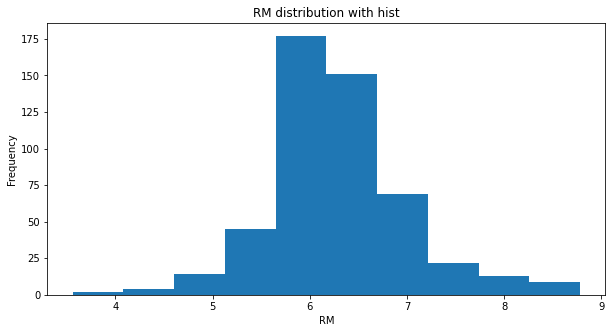

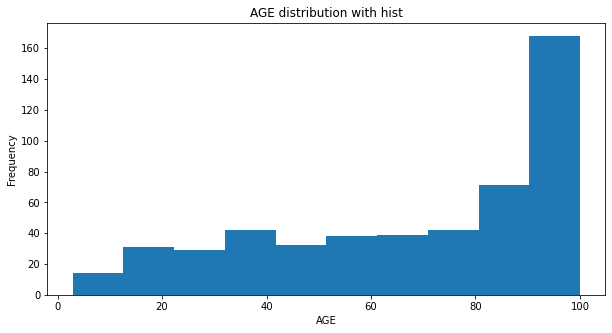

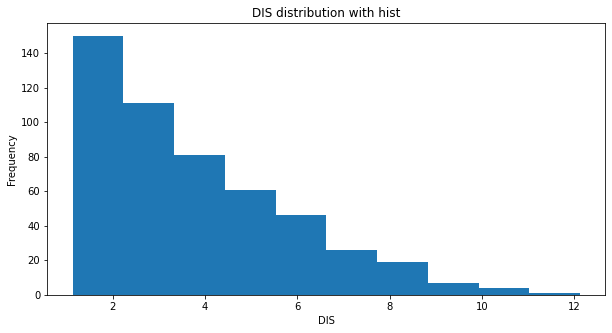

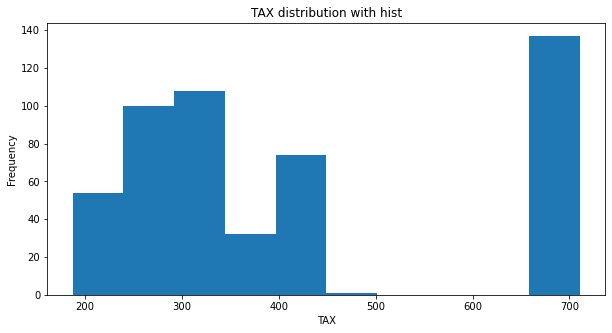

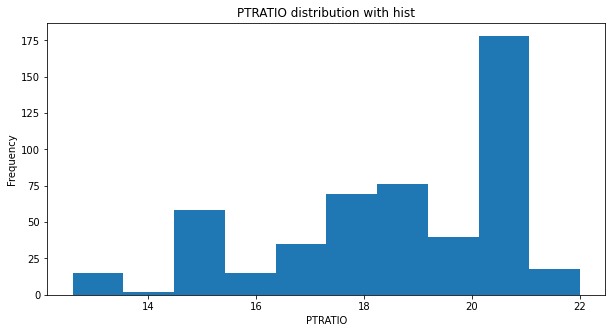

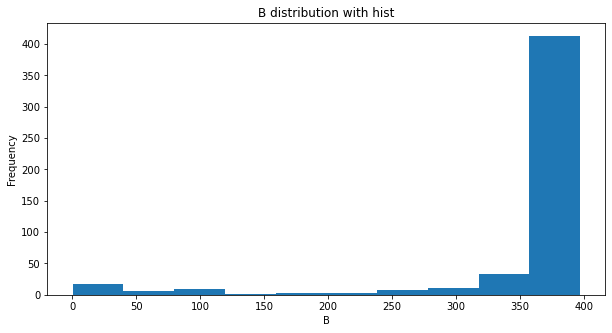

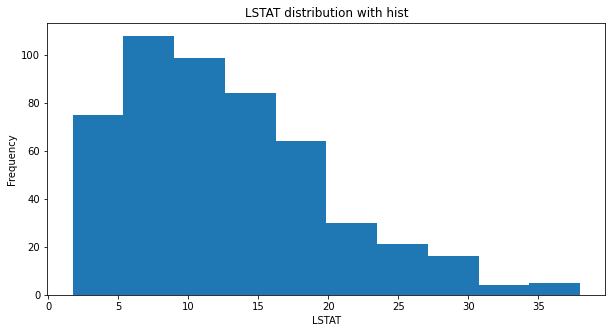

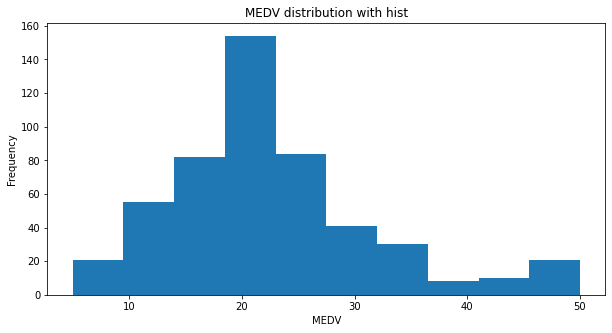

In [10]:
names2 = ['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
for j in names2:
    plot__hist(j)

### Всевозможные парные зависимости признаков 

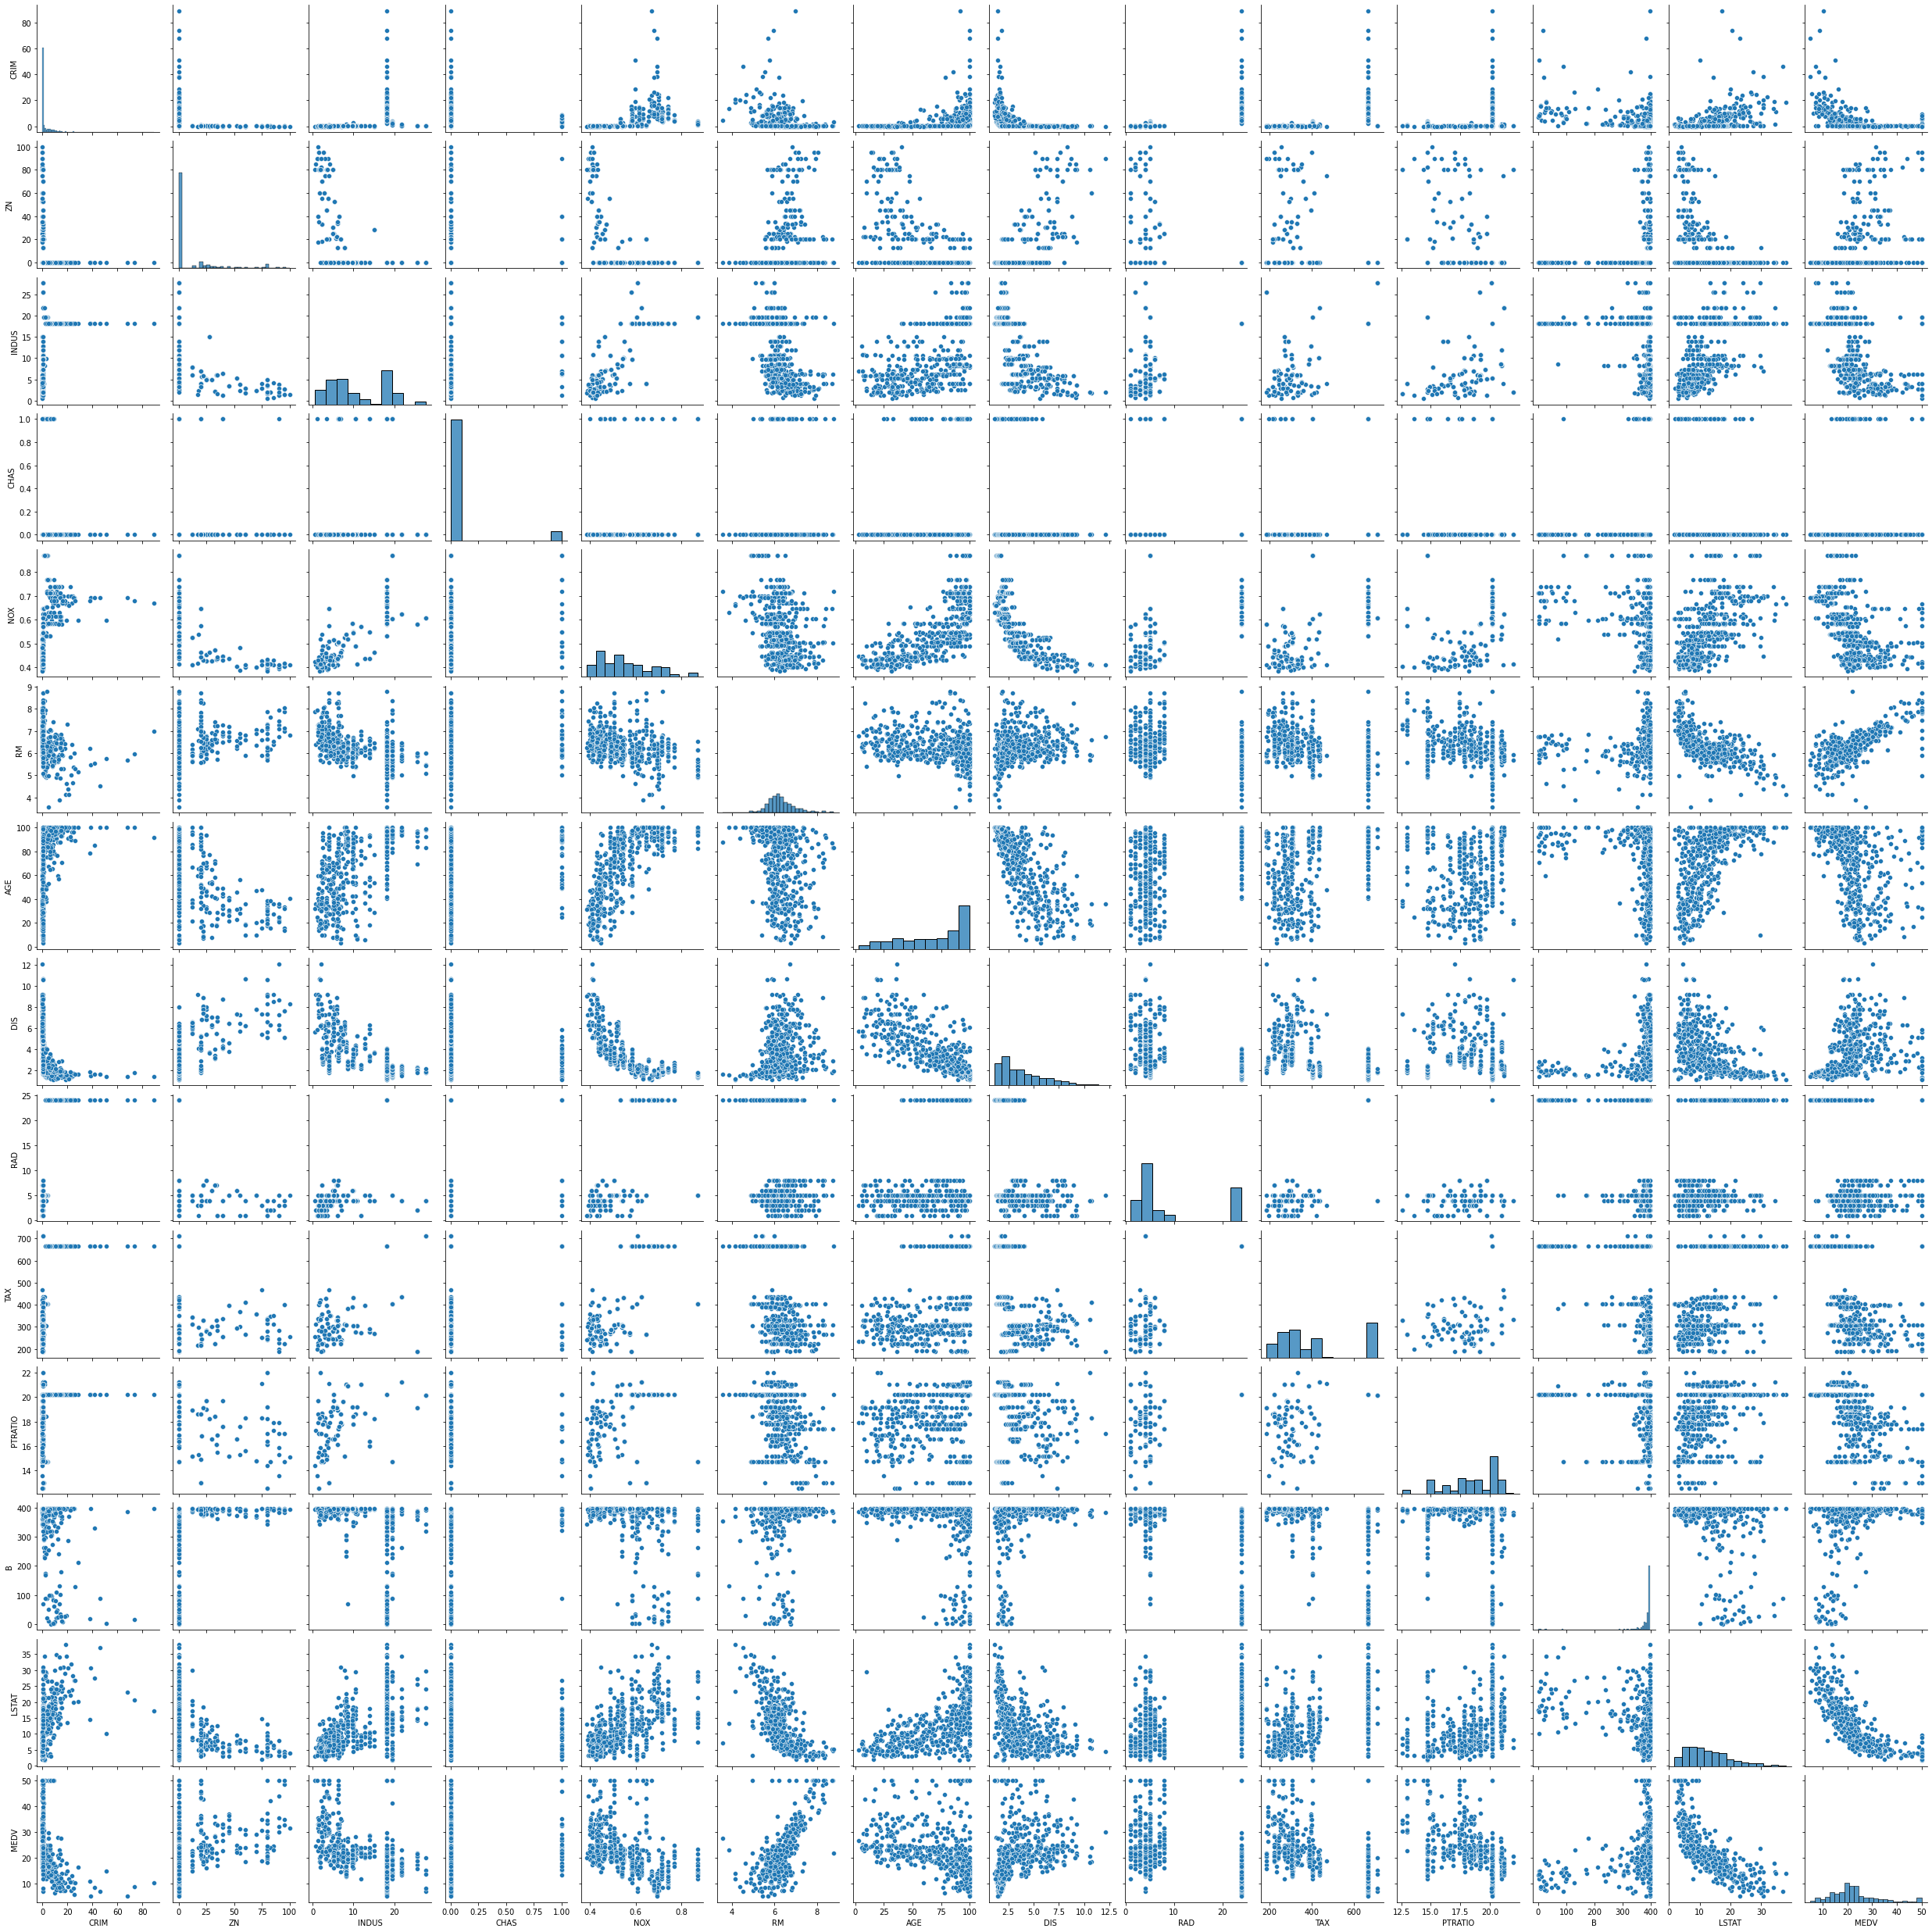

In [11]:
sns.pairplot(data)

In [12]:
correlation = data.corr()

<AxesSubplot:>

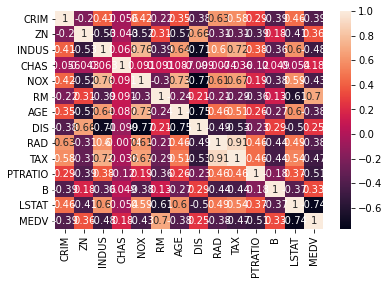

In [13]:
sns.heatmap(correlation, annot = True)

Судя по тепловой карте коэффициента корреляции, лучше всего коррелируют с целевой переменной MEDV: LSTAT - по отрицательной шкале, RM - по положительной шкале. Посмотрим отдельно эти зависимости.

### LSTAT -- MEDV

In [14]:
data[['LSTAT', 'MEDV']].groupby(['LSTAT'], as_index=False).mean().sort_values(by='MEDV', ascending = False)

,LSTAT,MEDV
0,1.73,50.0
15,3.32,50.0
1,1.92,50.0
58,5.12,50.0
5,2.88,50.0
...,...,...
414,23.97,7.0
443,29.97,6.3
429,26.77,5.6
405,22.98,5.0


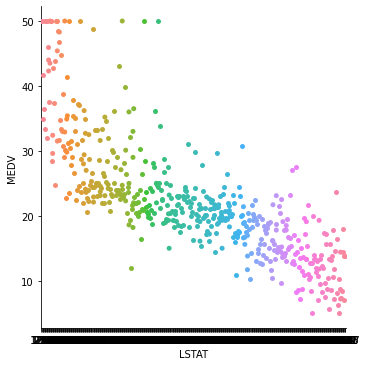

In [15]:
sns.catplot(x = "LSTAT", y = "MEDV", data = data, kind = "strip")
plt.show()

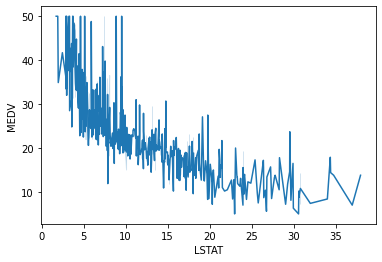

In [16]:
sns.lineplot(x="LSTAT", y="MEDV", data=data)
plt.show()

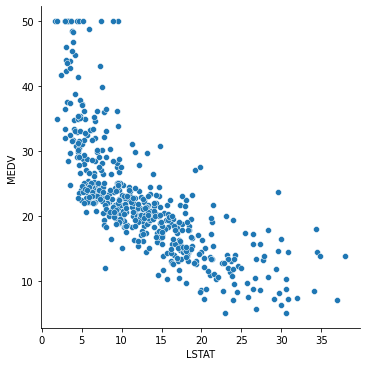

In [17]:
#Scatterplot 
sns.relplot(
    data=data,
    x="LSTAT", y="MEDV"
)

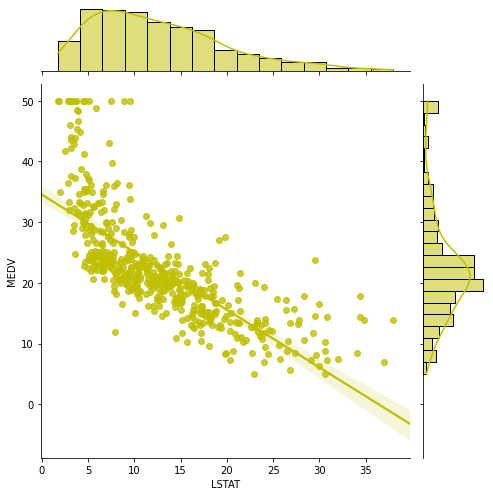

In [18]:
#Linear regression with marginal distributions
sns.jointplot(x="LSTAT", y="MEDV", data=data,
                  kind="reg", truncate=False,
                  color="y", height=7)

Из всех графиков лучше всего отображает результат joinplot, т.к. подходит для количественных признаков, показывает распределение и делает и показывает регресию

### RM -- MEDV

In [19]:
data[['RM', 'MEDV']].groupby(['RM'], as_index=False).mean().sort_values(by='MEDV', ascending = False)

,RM,MEDV
223,6.216,50.0
431,7.923,50.0
444,8.725,50.0
443,8.704,50.0
441,8.375,50.0
...,...,...
32,5.414,7.0
97,5.852,6.3
152,5.987,5.6
34,5.453,5.0


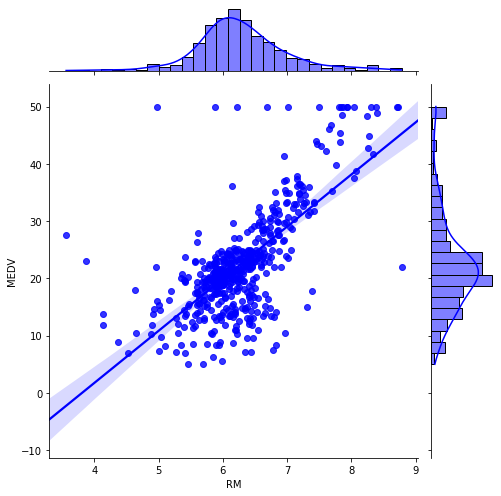

In [20]:
#Linear regression with marginal distributions
sns.jointplot(x="RM", y="MEDV", data=data,
                  kind="reg", truncate=False,
                  color="b", height=7)

### CHAS -- MEDV

In [21]:
data[['CHAS', 'MEDV']].groupby('CHAS', as_index=False).mean().sort_values(by='MEDV', ascending=False)

,CHAS,MEDV
1,1,28.440000
0,0,22.093843


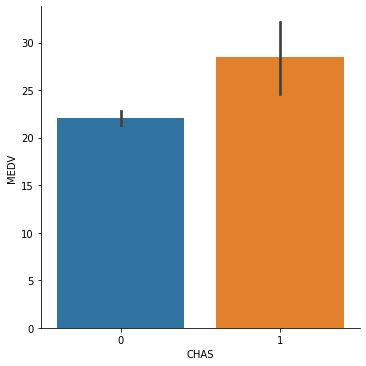

In [22]:
sns.catplot(x ='CHAS', y = 'MEDV', kind = 'bar', data = data)
plt.show()

### RAD -- MEDV

In [23]:
data[['RAD', 'MEDV']].groupby('RAD', as_index=False).mean().sort_values(by='MEDV', ascending=False)

,RAD,MEDV
7,8,30.358333
2,3,27.928947
6,7,27.105882
1,2,26.833333
4,5,25.706957
0,1,24.365000
3,4,21.387273
5,6,20.976923
8,24,16.403788


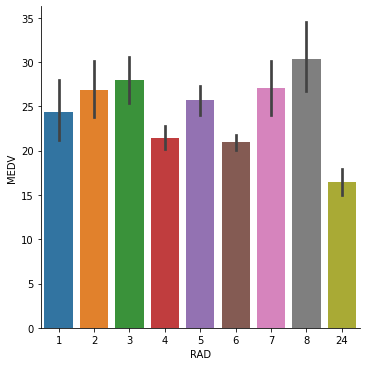

In [24]:
sns.catplot(x ='RAD', y = 'MEDV', kind = 'bar', data = data)

### AGE -- MEDV

<AxesSubplot:xlabel='AGE', ylabel='Count'>

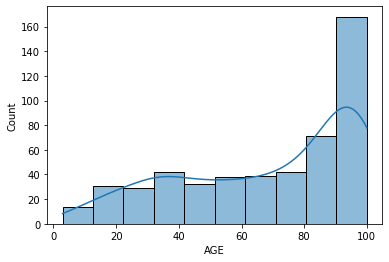

In [25]:
sns.histplot(x='AGE', data=data, kde=True)

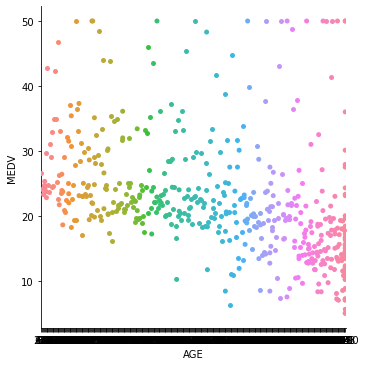

In [26]:
sns.catplot(x ='AGE', y = 'MEDV', kind = 'strip', data = data)

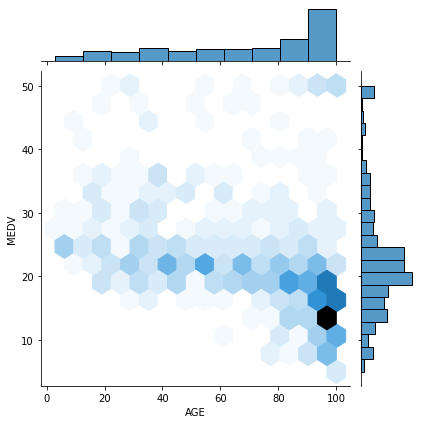

In [27]:
sns.jointplot(x ='AGE', y = 'MEDV', kind = 'hex', data = data)

### B -- MEDV

In [28]:
data[['B', 'MEDV']].groupby('B', as_index=False).mean().sort_values(by='MEDV', ascending=False)

,B,MEDV
215,389.70,50.0
157,382.00,50.0
265,392.63,50.0
102,366.15,50.0
227,390.55,50.0
...,...,...
14,27.25,7.2
75,344.05,7.0
27,88.27,7.0
70,338.16,6.3


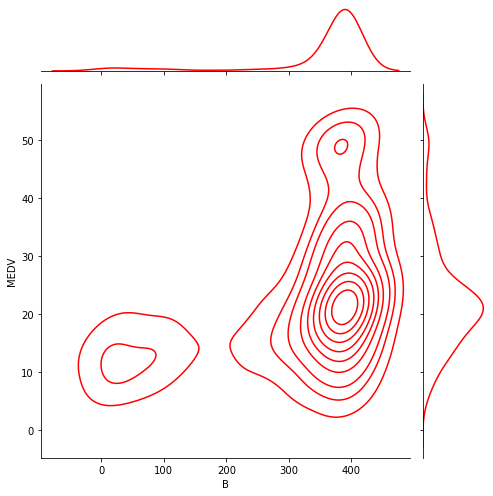

In [29]:
sns.jointplot(x="B", y="MEDV", data=data,
                  kind="kde",
                  color="red", height=7)

### Пропущенные значения

In [30]:
data.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

Как и ранее можно было убедиться по методу .info(), так и другим способом, уведили, что пропущенных значений нет.

### Поиск выбросов


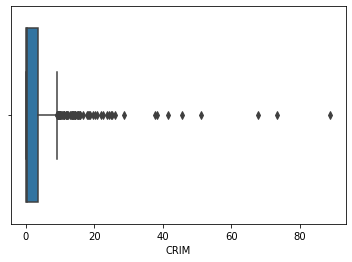

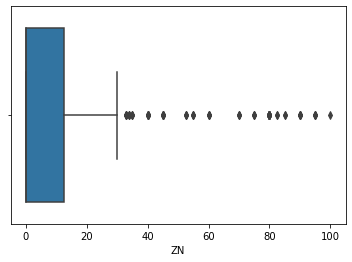

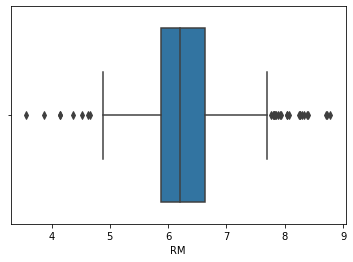

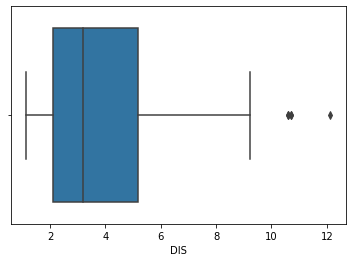

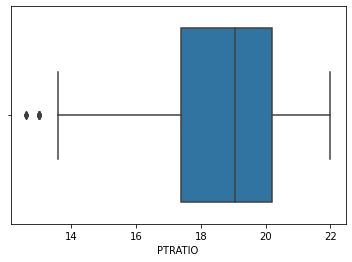

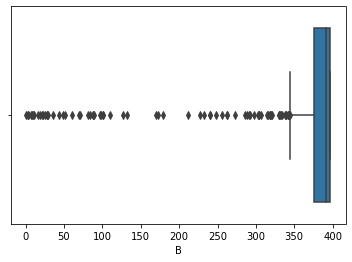

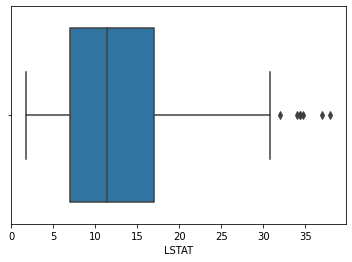

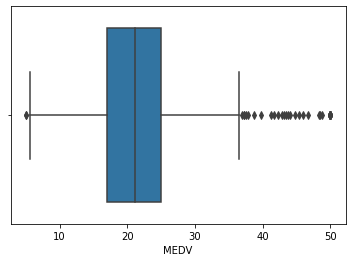

In [31]:
def get_boxplot(X, columns=[]):
    for i in columns:
        sns.boxplot(x=X[i])
        plt.show()
    pass  

get_boxplot(data,["CRIM","ZN", 'RM', 'DIS', 'PTRATIO', 'B', 'LSTAT', 'MEDV'])

Оставим из всех признаков для анализа только те, у которых есть "выброс" = дальше усов существуют значения. Выявим такие строки, где выбросов больше всего при помощи алгоритма IF

In [32]:
from sklearn.ensemble import IsolationForest

In [33]:
def detect_outliers(data,features):
    data['outlier_rang'] = 0
    for c in features:
        Q1 = np.percentile(data[c],25)
        Q3 = np.percentile(data[c],75)
        IQR = Q3 - Q1
        outlier_step = IQR * 1.5
        outlier_list_col = data[(data[c] < Q1 - outlier_step) | (data[c] > Q3 + outlier_step)].index
        data.loc[outlier_list_col, 'outlier_rang'] = data.loc[outlier_list_col, 'outlier_rang'] + 1

    isol_forest = data[IsolationForest().fit_predict(data[features])<0].index
    data.loc[isol_forest, 'outlier_rang'] = data.loc[isol_forest, 'outlier_rang'] + 1
    return data

data = detect_outliers(data,["CRIM","ZN", 'RM', 'DIS', 'PTRATIO', 'B', 'LSTAT', 'MEDV'])  

In [34]:
# исходя из результата выбросов, можем выставить границу, какие учитываем, а какие нет. Из-за небольшого 
# количества данных поставим границу для неучёта строк с выбросами >=4 
data['outlier_rang'].value_counts()

0    283
1    121
2     54
3     35
4     11
5      2
Name: outlier_rang, dtype: int64

In [35]:
data[data['outlier_rang']>3]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,outlier_rang
195,0.01381,80.0,0.46,0,0.4220,7.875,32.0,5.6484,4,255,14.4,394.23,2.97,50.0,4
203,0.03510,95.0,2.68,0,0.4161,7.853,33.2,5.1180,4,224,14.7,392.78,3.81,48.5,4
204,0.02009,95.0,2.68,0,0.4161,8.034,31.9,5.1180,4,224,14.7,390.55,2.88,50.0,4
257,0.61154,20.0,3.97,0,0.6470,8.704,86.9,1.8010,5,264,13.0,389.70,5.12,50.0,4
262,0.52014,20.0,3.97,0,0.6470,8.398,91.5,2.2885,5,264,13.0,386.86,5.91,48.8,4
267,0.57834,20.0,3.97,0,0.5750,8.297,67.0,2.4216,5,264,13.0,384.54,7.44,50.0,4
283,0.01501,90.0,1.21,1,0.4010,7.923,24.8,5.8850,1,198,13.6,395.52,3.16,50.0,4
367,13.52220,0.0,18.10,0,0.6310,3.863,100.0,1.5106,24,666,20.2,131.42,13.33,23.1,4
374,18.49820,0.0,18.10,0,0.6680,4.138,100.0,1.1370,24,666,20.2,396.90,37.97,13.8,4
384,20.08490,0.0,18.10,0,0.7000,4.368,91.2,1.4395,24,666,20.2,285.83,30.63,8.8,4


In [36]:
data = data[data['outlier_rang']<4]

Введём дополнительный бинарный признак классификатор для MEDV >=25(0), <25(1)

In [55]:
data['MEDV_class'] = np.where(data['MEDV'] >= 25, 0, 1 )

<ipython-input-55-6d5c306feed3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['MEDV_class'] = np.where(data['MEDV'] >= 25, 0, 1 )


In [56]:
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,outlier_rang,MEDV_class
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,0,1
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,0,1
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,0,0
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,0,0
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4,0,1
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6,0,1
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9,0,1
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0,0,1


# Modeling

In [37]:
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from lightgbm import LGBMClassifier

### Train-Test split

In [57]:
data.shape

(493, 16)

In [58]:
X_train = data.drop(labels = "MEDV", axis = 1)
y_train = data["MEDV_class"]
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size = 0.20, random_state = 42)
print("X_train",len(X_train))
print("X_test",len(X_test))
print("y_train",len(y_train))
print("y_test",len(y_test))

X_train 394
X_test 99
y_train 394
y_test 99


## Обучение моделей, решая задачу как разделение на две равные части

* Decision Tree
* SVM
* Random Forest
* KNN
* Logistic Regression
* LGBMClassifier

In [61]:
random_state = 42
classifiers = {
            "DT":DecisionTreeClassifier(random_state = random_state),
            "SVC":SVC(random_state = random_state),
            "RF":RandomForestClassifier(random_state = random_state),
            "LG":LogisticRegression(random_state = random_state),
            "KNN":KNeighborsClassifier(),
            "LGBM":LGBMClassifier()
            }

In [62]:
for i, clf in classifiers.items():
    clf.fit(X_train,y_train)
    train_pred = clf.predict(X_train) 
    test_pred = clf.predict(X_test)

    print(f'--------------------\n{i}\n\t\tTrain\tTest')
    print(f"Accuracy: \t{accuracy_score(y_train,train_pred):.3}\t{accuracy_score(y_test,test_pred):.3}")
    print(f"Precision:  \t{precision_score(y_train,train_pred):.3}\t{precision_score(y_test,test_pred):.3}")
    print(f"Recall:  \t{recall_score(y_train,train_pred):.3}\t{recall_score(y_test,test_pred):.3}")
    print(f"F1-score:  \t{f1_score(y_train,train_pred):.3}\t{f1_score(y_test,test_pred):.3}")

--------------------
DT
		Train	Test
Accuracy: 	1.0	1.0
Precision:  	1.0	1.0
Recall:  	1.0	1.0
F1-score:  	1.0	1.0
--------------------
SVC
		Train	Test
Accuracy: 	0.739	0.778
Precision:  	0.739	0.778
Recall:  	1.0	1.0
F1-score:  	0.85	0.875
--------------------
RF
		Train	Test
Accuracy: 	1.0	1.0
Precision:  	1.0	1.0
Recall:  	1.0	1.0
F1-score:  	1.0	1.0
--------------------
LG
		Train	Test
Accuracy: 	0.949	0.909
Precision:  	0.956	0.915
Recall:  	0.976	0.974
F1-score:  	0.966	0.943
--------------------
KNN
		Train	Test
Accuracy: 	0.881	0.859
Precision:  	0.901	0.871
Recall:  	0.942	0.961
F1-score:  	0.921	0.914
--------------------
LGBM
		Train	Test
Accuracy: 	1.0	1.0
Precision:  	1.0	1.0
Recall:  	1.0	1.0
F1-score:  	1.0	1.0


C:\Users\first\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [89]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

## Обучение моделей, решая задачу как предсказание значения

* Decision Tree Regressor
* Linear Regression
* Random Forest Regressor


In [85]:
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,outlier_rang,MEDV_class
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,0,1
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,0,1
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,0,0
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,0,0
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4,0,1
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6,0,1
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9,0,1
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0,0,1


In [92]:
X_train2 = data.drop(labels = "MEDV", axis = 1)
y_train2 = data["MEDV"]
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_train2, y_train2, test_size = 0.20, random_state = 42)
print("X_train2",len(X_train2))
print("X_test2",len(X_test2))
print("y_train2",len(y_train2))
print("y_test2",len(y_test2))

X_train2 394
X_test2 99
y_train2 394
y_test2 99


In [95]:
random_state = 42
predictors = {
            "DTR":DecisionTreeRegressor(random_state = random_state),
            "LR":LinearRegression(),
            "RFR":RandomForestRegressor(random_state = random_state)
            }

In [96]:
for i, clf in predictors.items():
    clf.fit(X_train2,y_train2)
    train_pred = clf.predict(X_train2) 
    test_pred = clf.predict(X_test2)

    print(f'--------------------\n{i}\n\t\tTrain\tTest')
    print(f"Quantity: \t{clf.score(X_train2,y_train2):.3}\t{clf.score(X_test2,y_test2):.3}")

--------------------
DTR
		Train	Test
Quantity: 	1.0	0.748
--------------------
LR
		Train	Test
Quantity: 	0.864	0.853
--------------------
RFR
		Train	Test
Quantity: 	0.984	0.887
